# Tarea 6. Distribución óptima de capital y selección de portafolios.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/en/f/f3/SML-chart.png" width="400px" height="400px" />

**Resumen.**
> En esta tarea, tendrás la oportunidad de aplicar los conceptos y las herramientas que aprendimos en el módulo 3. Específicamente, utilizarás técnicas de optimización media-varianza para construir la frontera de mínima varianza, encontrar el mejor portafolio sobre la frontera mínima varianza, y finalmente, identificar la asignación óptima de capital para un inversionista dado su nivel de averisón al riesgo.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea6_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea6_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Datos (10 puntos)

Considere los siguientes datos de bonos, índice de acciones, mercados desarrollados, mercados emergentes, fondos privados, activos reales y activos libres de riesgo:

In [4]:
# Importamos pandas y numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Resumen en base anual de rendimientos esperados y volatilidades
annual_ret_summ = pd.DataFrame(columns=['Bonos', 'Acciones', 'Desarrollado', 'Emergente', 'Privados', 'Real', 'Libre_riesgo'], index=['Media', 'Volatilidad'])
annual_ret_summ.loc['Media'] = np.array([0.0400, 0.1060, 0.0830, 0.1190, 0.1280, 0.0620, 0.0300])
annual_ret_summ.loc['Volatilidad'] = np.array([0.0680, 0.2240, 0.2210, 0.3000, 0.2310, 0.0680, None])

annual_ret_summ.round(4)

,Bonos,Acciones,Desarrollado,Emergente,Privados,Real,Libre_riesgo
Media,0.04,0.106,0.083,0.119,0.128,0.062,0.03
Volatilidad,0.068,0.224,0.221,0.3,0.231,0.068,None


In [6]:
# Matriz de correlación
corr = pd.DataFrame(data= np.array([[1.0000, 0.4000, 0.2500, 0.2000, 0.1500, 0.2000],
                                    [0.4000, 1.0000, 0.7000, 0.6000, 0.7000, 0.2000],
                                    [0.2500, 0.7000, 1.0000, 0.7500, 0.6000, 0.1000],
                                    [0.2000, 0.6000, 0.7500, 1.0000, 0.2500, 0.1500],
                                    [0.1500, 0.7000, 0.6000, 0.2500, 1.0000, 0.3000],
                                    [0.2000, 0.2000, 0.1000, 0.1500, 0.3000, 1.0000]]),
                    columns=annual_ret_summ.columns[:-1], index=annual_ret_summ.columns[:-1])
corr.round(4)

,Bonos,Acciones,Desarrollado,Emergente,Privados,Real
Bonos,1.00,0.4,0.25,0.20,0.15,0.20
Acciones,0.40,1.0,0.70,0.60,0.70,0.20
Desarrollado,0.25,0.7,1.00,0.75,0.60,0.10
Emergente,0.20,0.6,0.75,1.00,0.25,0.15
Privados,0.15,0.7,0.60,0.25,1.00,0.30
Real,0.20,0.2,0.10,0.15,0.30,1.00


1. Graficar en el espacio de rendimiento esperado contra volatilidad cada uno de los activos (10 puntos).

In [7]:
# Activos
E1 = annual_ret_summ.loc['Media','Bonos']
E2 = annual_ret_summ.loc['Media','Acciones']
E3 = annual_ret_summ.loc['Media','Desarrollado']
E4 = annual_ret_summ.loc['Media','Emergente']
E5 = annual_ret_summ.loc['Media','Privados']
E6 = annual_ret_summ.loc['Media','Real']
E7 = annual_ret_summ.iloc[0,6]
# Volatilidades individuales
s1 = annual_ret_summ.loc['Volatilidad','Bonos']
s2 = annual_ret_summ.loc['Volatilidad','Acciones']
s3 = annual_ret_summ.loc['Volatilidad','Desarrollado']
s4 = annual_ret_summ.loc['Volatilidad','Emergente']
s5 = annual_ret_summ.loc['Volatilidad','Privados']
s6 = annual_ret_summ.loc['Volatilidad','Real']
s7 = 0

Text(0, 0.5, 'Rendimiento Esperado $\\E[r]')

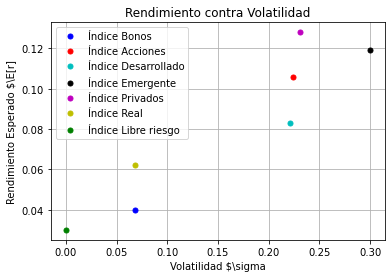

In [8]:
plt.plot(s1, E1, 'ob', ms=5, label='Índice Bonos')
plt.plot(s2, E2, 'or', ms=5, label='Índice Acciones')
plt.plot(s3, E3, 'oc', ms=5, label='Índice Desarrollado')
plt.plot(s4, E4, 'ok', ms=5, label='Índice Emergente')
plt.plot(s5, E5, 'om', ms=5, label='Índice Privados')
plt.plot(s6, E6, 'oy', ms=5, label='Índice Real')
plt.plot(s7, E7, 'og', ms=5, label='Índice Libre riesgo')
plt.grid()
plt.legend(loc='best')
plt.title('Rendimiento contra Volatilidad')
plt.xlabel('Volatilidad $\sigma')
plt.ylabel('Rendimiento Esperado $\E[r]')

## 2. Hallando portafolios sobre la frontera de mínima varianza (35 puntos)

Usando los datos del punto anterior:

1. Halle los pesos del portafolio de mínima varianza considerando todos los activos riesgosos. También reportar claramente el rendimiento esperado, volatilidad y cociente de Sharpe para dicho portafolio (15 puntos).
2. Halle los pesos del portafolio EMV considerando todos los activos riesgosos. También reportar claramente el rendimiento esperado, volatilidad y cociente de Sharpe para dicho portafolio (15 puntos).
3. Halle la covarianza y la correlación entre los dos portafolios hallados (5 puntos)


1. Halle los pesos del portafolio de mínima varianza considerando todos los activos riesgosos. También reportar claramente el rendimiento esperado, volatilidad y cociente de Sharpe para dicho portafolio (15 puntos).

In [9]:
# Importamos funcion minimize del modulo optimize de scipy
from scipy.optimize import minimize

In [10]:
rf = 0.03

annual_ret_summ = annual_ret_summ.drop(columns=['Libre_riesgo'])

In [11]:

## Construcción de parámetros
# 1. Sigma: matriz de varianza-covarianza Sigma = S.dot(corr).dot(S)
S = np.diag(annual_ret_summ.loc['Volatilidad'].values)
Sigma = S.dot(corr).dot(S)
# 2. Eind: rendimientos esperados activos individuales
Eind = annual_ret_summ.loc['Media'].values

In [12]:
# Función objetivo
def var(w, Sigma):
    return w.T.dot(Sigma).dot(w)

In [13]:
# Número de activos
N = len(Eind)
# Dato inicial
w0 = np.ones(N)/N
# Cotas de las variables
bnds = ((0, 1), ) * N
# Restricciones
cons = {'type': 'eq', 'fun': lambda w: w.sum() - 1}

In [14]:
# Portafolio de mínima varianza
minvar = minimize(fun=var,
                  x0=w0,
                  args=(Sigma,),
                  bounds=bnds,
                  constraints=cons)
minvar

     fun: 0.0027745037325952863
     jac: array([0.00551408, 0.00912289, 0.00525779, 0.00714968, 0.00710235,
       0.0055834 ])
 message: 'Optimization terminated successfully'
    nfev: 56
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([4.95146500e-01, 0.00000000e+00, 2.09837058e-04, 4.33680869e-19,
       0.00000000e+00, 5.04643663e-01])

In [15]:
# Pesos, rendimiento y riesgo del portafolio de mínima varianza
w_minvar = minvar.x
E_minvar = Eind.T.dot(w_minvar)
s_minvar = var(w_minvar, Sigma)**0.5
RS_minvar = (E_minvar - rf) / s_minvar
w_minvar, E_minvar, s_minvar, RS_minvar

(array([4.95146500e-01, 0.00000000e+00, 2.09837058e-04, 4.33680869e-19,
        0.00000000e+00, 5.04643663e-01]),
 0.0511111835712562,
 0.0526735581918982,
 0.4007928132431225)

2. Halle los pesos del portafolio EMV considerando todos los activos riesgosos. También reportar claramente el rendimiento esperado, volatilidad y cociente de Sharpe para dicho portafolio (15 puntos).

In [16]:
# Función objetivo
def menos_RS(w, Eind, rf, Sigma):
    E_port = Eind.T.dot(w)
    s_port = var(w, Sigma)**0.5
    RS = (E_port - rf) / s_port
    return - RS

In [17]:
# Número de activos
N = len(Eind)
# Dato inicial
w0 = np.ones(N)/N
# Cotas de las variables
bnds = ((0, 1), ) * N
# Restricciones
cons = {'type': 'eq', 'fun': lambda w: w.sum() - 1}

In [18]:
# Portafolio EMV
emv = minimize(fun=menos_RS,
                  x0=w0,
                  args=(Eind, rf, Sigma),
                  bounds=bnds,
                  constraints=cons)
emv

     fun: -0.5811986201269204
     jac: array([-0.36522095, -0.28920724, -0.12258474, -0.36597763, -0.36617207,
       -0.36620118])
 message: 'Optimization terminated successfully'
    nfev: 44
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([1.34289953e-17, 1.01738175e-16, 1.23637069e-16, 8.19187951e-02,
       1.65859031e-01, 7.52222174e-01])

In [19]:
# Pesos, rendimiento y riesgo del portafolio EMV
w_emv = emv.x
E_emv = Eind.T.dot(w_emv)
s_emv = var(w_emv, Sigma)**0.5
RS_emv = (E_emv - rf) / s_emv
w_emv, E_emv, s_emv, RS_emv

(array([1.34289953e-17, 1.01738175e-16, 1.23637069e-16, 8.19187951e-02,
        1.65859031e-01, 7.52222174e-01]),
 0.0776160673678556,
 0.0819273579098611,
 0.5811986201269204)

In [20]:
w_minvar, E_minvar, s_minvar, RS_minvar

(array([4.95146500e-01, 0.00000000e+00, 2.09837058e-04, 4.33680869e-19,
        0.00000000e+00, 5.04643663e-01]),
 0.0511111835712562,
 0.0526735581918982,
 0.4007928132431225)

In [21]:
annual_ret_summ.columns

Index(['Bonos', 'Acciones', 'Desarrollado', 'Emergente', 'Privados', 'Real'], dtype='object')

3. Halle la covarianza y la correlación entre los dos portafolios hallados (5 puntos)

In [22]:
# Covarianza entre los portafolios
cov_emv_minvar = w_emv.T.dot(Sigma).dot(w_minvar)
cov_emv_minvar

0.00298181903668825

In [23]:
# Correlación entre los portafolios
corr_emv_minvar = cov_emv_minvar / (s_emv * s_minvar)
corr_emv_minvar

0.6909707716261658

## 3. Frontera de mínima varianza y LAC (30 puntos)

Con los portafolios que se encontraron en el punto anterior (de mínima varianza y EMV):

1. Construya la frontera de mínima varianza calculando el rendimiento esperado y volatilidad para varias combinaciones de los anteriores portafolios. Reportar dichas combinaciones en un DataFrame incluyendo pesos, rendimiento, volatilidad y cociente de Sharpe (15 puntos).
2. También construya la línea de asignación de capital entre el activo libre de riesgo y el portafolio EMV. Reportar las combinaciones de estos activos en un DataFrame incluyendo pesos, rendimiento, volatilidad y cociente de Sharpe (15 puntos).

In [24]:
# Vector de w
w_p = np.linspace(0, 4)

In [25]:
# DataFrame de portafolios: 
# 1. Índice: i
# 2. Columnas 1-2: w, 1-w
# 3. Columnas 3-4: E[r], sigma
# 4. Columna 5: Sharpe ratio
frontera = pd.DataFrame(data={'W': w_p,
                              'Media': w_p * E_emv + (1 - w_p) * E_minvar,
                              'Vol': ((w_p * s_emv)**2 + ((1 - w_p) * s_minvar)**2 + 2 * w_p * (1 - w_p) * cov_emv_minvar)**0.5})
frontera['RS'] = (frontera['Media'] - rf) /frontera['Vol']
frontera.head()

,W,Media,Vol,RS
0,0.000000,0.051111,0.052674,0.400793
1,0.081633,0.053275,0.053215,0.437374
2,0.163265,0.055439,0.054186,0.469468
3,0.244898,0.057602,0.055564,0.496765
4,0.326531,0.059766,0.057319,0.519297


In [26]:
sp = np.linspace(0, 0.2)


In [27]:
LAC = pd.DataFrame(data={'Vol': sp,
                         'Media': RS_emv * sp + rf})
LAC['RS'] = (LAC['Media'] - rf) /LAC['Vol']
LAC.head()

,Vol,Media,RS
0,0.000000,0.030000,NaN
1,0.004082,0.032372,0.581199
2,0.008163,0.034744,0.581199
3,0.012245,0.037117,0.581199
4,0.016327,0.039489,0.581199


## 4. Gráficos y conclusiones (25 puntos)

1. Usando todos los datos obtenidos, grafique:
 - los activos individuales,
 - portafolio de mínima varianza,
 - portafolio eficiente en media-varianza (EMV),
 - frontera de mínima varianza, y
 - línea de asignación de capital,
en el espacio de rendimiento (eje $y$) vs. volatilidad (eje $x$). Asegúrese de etiquetar todo y poner distintos colores para diferenciar los distintos elementos en su gráfico (15 puntos).
2. Suponga que usted está aconsejando a un cliente cuyo coeficiente de aversión al riesgo resultó ser 4. ¿Qué asignación de capital le sugeriría?, ¿qué significa su resultado?(10 puntos)

In [28]:
from matplotlib import pyplot as plt
%matplotlib inline

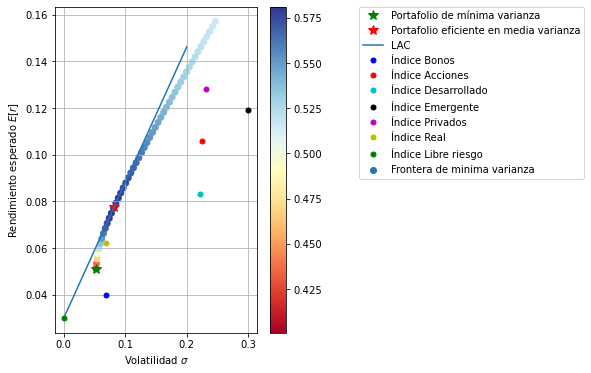

In [30]:
# Gráfica de dispersión de puntos coloreando 
# de acuerdo a SR, los activos individuales
# y los portafolios hallados
plt.figure(figsize=(10, 6))
# Frontera
ax = plt.subplot(121) #
plt.scatter(frontera['Vol'], frontera['Media'], c = frontera['RS'], cmap='RdYlBu', label = 'Frontera de minima varianza')
plt.colorbar()

# Port. óptimos
plt.plot(s_minvar, E_minvar, '*g', ms=10, label='Portafolio de mínima varianza')
plt.plot(s_emv, E_emv, '*r', ms=10, label='Portafolio eficiente en media varianza')
plt.plot(LAC['Vol'], LAC['Media'], label = 'LAC')
plt.plot(s1, E1, 'ob', ms=5, label='Índice Bonos')
plt.plot(s2, E2, 'or', ms=5, label='Índice Acciones')
plt.plot(s3, E3, 'oc', ms=5, label='Índice Desarrollado')
plt.plot(s4, E4, 'ok', ms=5, label='Índice Emergente')
plt.plot(s5, E5, 'om', ms=5, label='Índice Privados')
plt.plot(s6, E6, 'oy', ms=5, label='Índice Real')
plt.plot(0, rf, 'og', ms=5, label='Índice Libre riesgo')
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento esperado $E[r]$')

plt.grid()
ax.legend(bbox_to_anchor=(1.5, 1), loc=2, borderaxespad=0.)



In [ ]:
# Para gamma=4
g = 4
w_opt = (E_emv - rf) / (g * s_emv**2)
w_opt

La recomendación sería una posición de más del 100% en el mercado de activos, invirtiendo 173% del capital que originalmente se tenía, de manera que sería necesario pedir prestado para lograr ese nivel de inversión de capital.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>